In [69]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,PowerTransformer,StandardScaler
from scipy.stats import chi2_contingency
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [36]:
df_feature = pd.read_csv('C:/Users/kyush/Desktop/test_1/clean_data.csv')
df_test = pd.read_csv('C:/Users/kyush/Desktop/test_1/test_clean_data.csv')
df_score = pd.read_csv('C:/Users/kyush/Desktop/test_1/score.csv')


In [37]:

df_feature.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_code,region_category_code,membership_category_code,year,joined_through_referral_code,preferred_offer_types_code,medium_of_operation_code,internet_option_code,used_special_discount_code,offer_application_preference_code,past_complaint_code,complaint_status_code,feedback_code
0,18,17,300.63,53005.25,781.75,0,2,3,4,1,1,0,2,1,1,0,1,4
1,32,16,306.34,12838.38,641.22,0,0,4,4,0,1,2,1,1,0,1,2,5
2,44,14,516.16,21027.00,500.69,0,1,2,5,2,1,2,2,0,1,1,3,3
3,37,11,53.27,25239.56,567.66,1,0,2,5,2,1,2,1,0,1,1,4,3
4,31,20,113.13,24483.66,663.06,0,0,2,4,1,0,3,1,0,1,1,2,3


In [38]:
df_feature.shape


(31325, 18)

In [39]:
df_feature.dtypes

age                                    int64
days_since_last_login                  int64
avg_time_spent                       float64
avg_transaction_value                float64
points_in_wallet                     float64
gender_code                            int64
region_category_code                   int64
membership_category_code               int64
year                                   int64
joined_through_referral_code           int64
preferred_offer_types_code             int64
medium_of_operation_code               int64
internet_option_code                   int64
used_special_discount_code             int64
offer_application_preference_code      int64
past_complaint_code                    int64
complaint_status_code                  int64
feedback_code                          int64
dtype: object

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

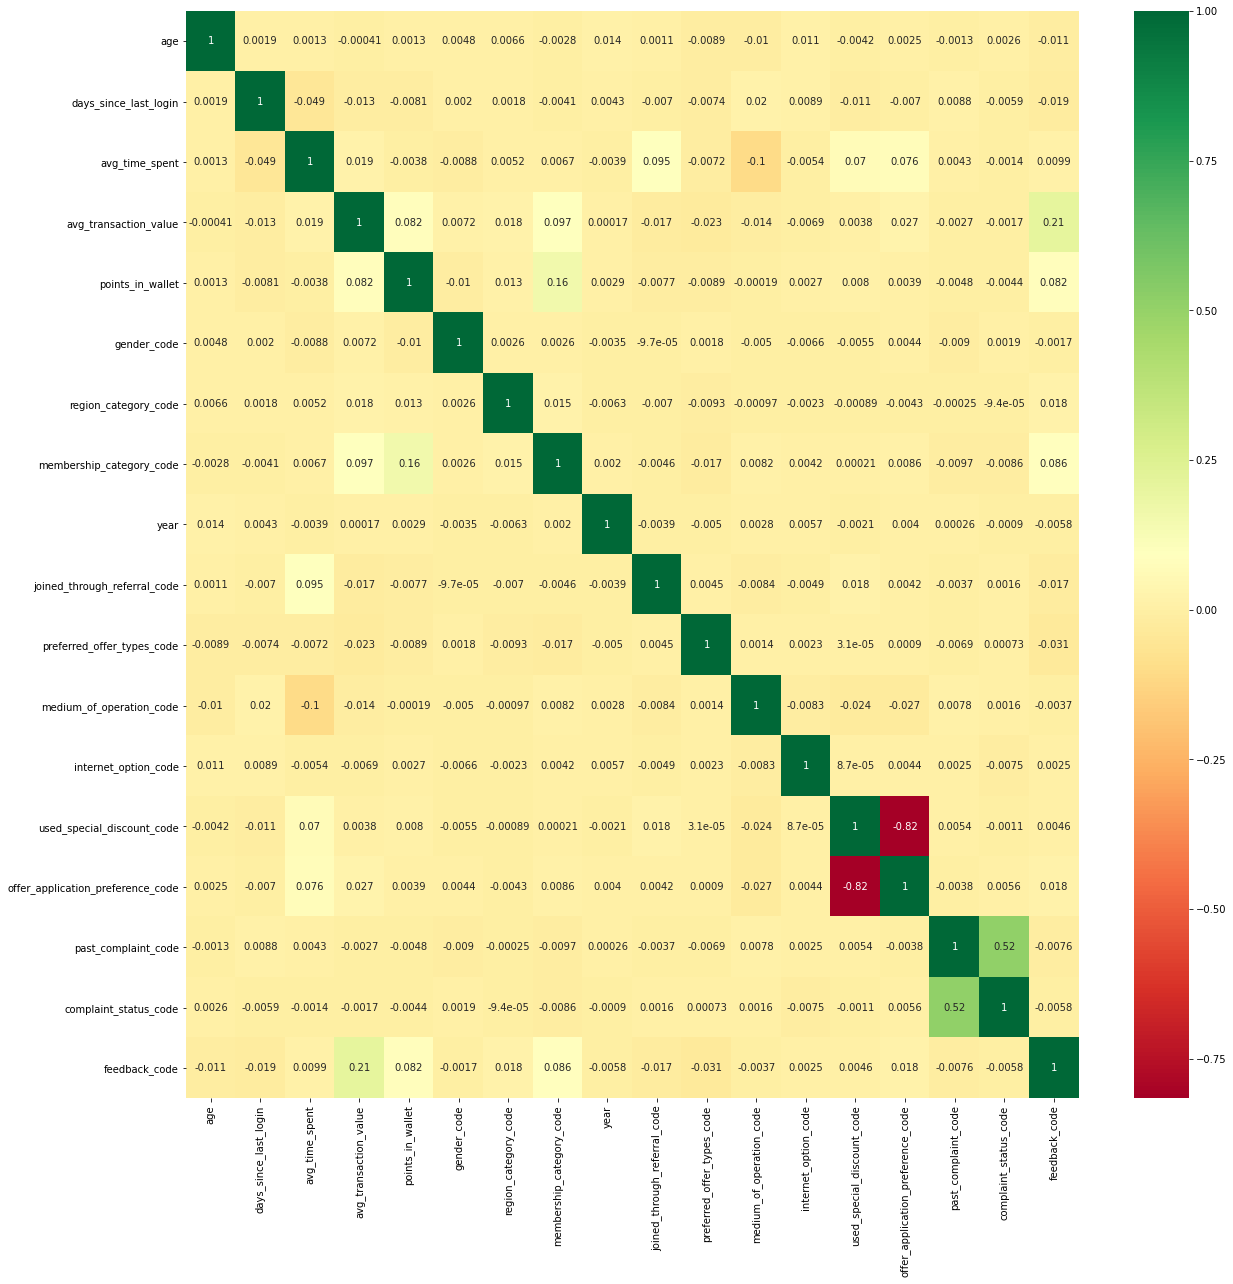

In [43]:
# Plotting The Correlations between all the features
corrmat = df_feature.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df_feature[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [44]:
X_train, X_val, y_train, y_val = train_test_split(df_feature,df_score,test_size=0.05, random_state = 42)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(29758, 18)
(29758, 1)
(1567, 18)
(1567, 1)


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [47]:
print(X_train)

[[ 1.37805752 -1.27558046  1.70503444 ...  0.99986559 -1.33457509
   1.92227773]
 [ 1.31513434 -0.77610123  2.13497207 ... -1.00013443 -0.51560564
  -0.41985754]
 [ 1.62975027  0.32275308 -0.09962689 ... -1.00013443 -0.51560564
  -0.41985754]
 ...
 [-1.70517859  0.02306554  1.27988794 ...  0.99986559  1.94130271
  -1.20056929]
 [-0.13209894 -0.67620538 -0.4271514  ...  0.99986559  1.12233326
  -0.41985754]
 [ 0.37128655  0.32275308  1.44192015 ...  0.99986559 -1.33457509
  -0.02950166]]


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [49]:
y_pred = rf.predict(X_val)
score_1 = f1_score(y_val,y_pred,average='macro')
score_1

0.611052036033819

In [50]:
#Logistic Regression
model_1 = LogisticRegression(max_iter=400)
model_1.fit(X_train,y_train.values.ravel())
predictions_1 = model_1.predict(X_val)
score_1 = f1_score(y_val,predictions_1,average='macro')
score_1

0.3319588449214605

In [51]:
#Logistic Regression
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train,y_train.values.ravel())
predictions_1 = model_1.predict(X_val)
score_1 = f1_score(y_val,predictions_1,average='macro')
score_1

0.3319588449214605

In [52]:
#KNN
model_2 = KNeighborsClassifier()
model_2.fit(X_train,y_train.values.ravel())
predictions_2 = model_2.predict(X_val)
score_2 = f1_score(y_val,predictions_2,average='macro')
score_2

0.33082635809807565

In [53]:
#SVM
model_3 = SVC()
model_3.fit(X_train,y_train.values.ravel())
predictions_3 = model_3.predict(X_val)
score_3 = f1_score(y_val,predictions_3,average='macro')
score_3

0.41568985370229194

In [54]:
#SVM
model_3 = SVC(max_iter=1000)
model_3.fit(X_train,y_train.values.ravel())
predictions_3 = model_3.predict(X_val)
score_3 = f1_score(y_val,predictions_3,average='macro')
score_3

C:\Users\kyush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.34142318051448023

In [55]:
#Decision Tree
model_4 = DecisionTreeClassifier()
model_4.fit(X_train,y_train.values.ravel())
predictions_4 = model_4.predict(X_val)
score_4 = f1_score(y_val,predictions_4,average='macro')
score_4

0.6041841050790598

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_val,y_val)
print(cm)
print(accuracy_score(y_val,y_val))

[[ 60   0   0   0   0   0]
 [  0 109   0   0   0   0]
 [  0   0 111   0   0   0]
 [  0   0   0 405   0   0]
 [  0   0   0   0 442   0]
 [  0   0   0   0   0 440]]
1.0


In [57]:
#random forest

In [58]:
model_5 = RandomForestClassifier()
model_5.fit(X_train,y_train.values.ravel())
predictions_5 = model_5.predict(X_val)
score_5 = f1_score(y_val,predictions_5,average='macro')
score_5

0.6083518405034822

In [59]:
from xgboost import XGBClassifier
model_6 = XGBClassifier()
model_6.fit(X_train,y_train.values.ravel())
predictions_6 = model_6.predict(X_val)
score_6 = f1_score(y_val,predictions_6,average='macro')
score_6

C:\Users\kyush\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6251837345331516

In [60]:
from xgboost import XGBClassifier
model_6 = XGBClassifier(max_iter=1000)
model_6.fit(X_train,y_train.values.ravel())
predictions_6 = model_6.predict(X_val)
score_6 = f1_score(y_val,predictions_6,average='macro')
score_6

C:\Users\kyush\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_iter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6251837345331516

In [61]:
import catboost as cb
cat_model = cb.CatBoostClassifier(verbose=2,iterations=90,depth=3,learning_rate=0.2,bagging_temperature=0.8,border_count=236,l2_leaf_reg=2)
cat_model.fit(X_train,y_train,eval_set=(X_val,y_val))
print(cat_model.best_score_)

0:	learn: 1.4874669	test: 1.4917966	best: 1.4917966 (0)	total: 21.2ms	remaining: 1.89s
2:	learn: 1.2286141	test: 1.2357102	best: 1.2357102 (2)	total: 46.8ms	remaining: 1.36s
4:	learn: 1.0723834	test: 1.0831464	best: 1.0831464 (4)	total: 70ms	remaining: 1.19s
6:	learn: 0.9656711	test: 0.9791841	best: 0.9791841 (6)	total: 98.5ms	remaining: 1.17s
8:	learn: 0.8999279	test: 0.9139055	best: 0.9139055 (8)	total: 133ms	remaining: 1.19s
10:	learn: 0.8436022	test: 0.8605376	best: 0.8605376 (10)	total: 159ms	remaining: 1.14s
12:	learn: 0.7939182	test: 0.8132408	best: 0.8132408 (12)	total: 183ms	remaining: 1.08s
14:	learn: 0.7630771	test: 0.7831055	best: 0.7831055 (14)	total: 206ms	remaining: 1.03s
16:	learn: 0.7389755	test: 0.7587362	best: 0.7587362 (16)	total: 229ms	remaining: 984ms
18:	learn: 0.7191142	test: 0.7406305	best: 0.7406305 (18)	total: 254ms	remaining: 950ms
20:	learn: 0.7015278	test: 0.7233949	best: 0.7233949 (20)	total: 275ms	remaining: 904ms
22:	learn: 0.6827721	test: 0.7050575	bes

In [62]:
predictions_8 = cat_model.predict(X_val)
score_8 = f1_score(y_val,predictions_8,average='macro')
score_8


0.6254310557803414

In [63]:
input_data=[ 24,16,32.42,37953.61,614.71,1,0,1,5,2,2,2,0,1,0,1,4,2]

In [64]:
input_data_as_numpy_array = np.asarray(input_data)

In [65]:
input_data_reshaped =  input_data_as_numpy_array.reshape(1,-1)

In [66]:
prediction = cat_model.predict(df_test[:1])

In [67]:
print(prediction)

[[2]]


In [68]:
if(prediction  > 3 ):
    print('The customer will not churn')
else:
    print('The customer will  churn')

The customer will  churn
